# Introduction to Object Oriented Programming

You have already started using functions to encapsulate code.  This is one approach to programming sometimes called modular programming.  A second approach is called object oriented programming.  An object is a set of data, called **attributes**, together with a set of functions, called **methods**, that manipulate the data.  Objects are constructed from a class which acts as a blueprint.  As it turns out everything in Python is an object.

## Building a class blueprint

To build a class blueprint we use the `class` keyword as follows:

```python
class HelloWorld:
    """A very simple class"""
    def __init__(self):
        print('Hello World')
```
Try this now by making a code cell and run this very simple class definition.

In [8]:
class HelloWorld:
    """A very simple class"""
    def __init__(self):
        print('Hello World')

Function defined inside a class are called `methods`.  In our simple example above we only have one method called __init__ .  Notice that methods are nested inside the class definition.  So we see the `class statement` defines a `CODE BLOCK` containing methods.  You will learn more about this a little later. 

## Instantiating an object

The class HellowWorld prints out `Hello World` when you construct an object from the class.  We do this as follows.
```python
obj_1 = HelloWorld()
```
Try this now by executing the code cell below and constructing a HelloWorld object.

In [13]:
obj_1 = HelloWorld()

Hello World


In [14]:
# Lets output the type of the object you just constructed
type(obj_1)

__main__.HelloWorld

In [17]:
# we can ask for help 
help(obj_1)

Help on HelloWorld in module __main__ object:

class HelloWorld(builtins.object)
 |  A very simple class
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



This does not tell us much but it does tell us that object is the name of a class in module builtins and that when we make an object of type object it is the most base type.  For now this is all we need to know.  We make an object by using the assignment statement `variable_name = ClassName(arguments)`.  Since we had no arguments we used `obj1 = HelloWorld()`.  Notice when we ran `type(obj1)` we got the result `__main__.HelloWorld` this tells us that the variable obj1 points to a HelloWorld object in our main program.

Finally when we made our `class HelloWorld(object):` we followed it with the function definition:

```python
def __init__(self):
    print('Hello World')
```
Notice the function definition is indented to indicate it is part of the class definition.  When a function is part of a class it is called a `method` instead of a `function`.  This is simply a convention to distinguish functions named ouside a class from functions defined inside a class.  

When we have a method name enclosed by double underscores, i.e. `__init__` it is called a special method.  We must define the `__init__` method in our class definition if we want to make objects.  In the `HelloWorld class` the `__init__` method simply prints `Hello World` when we make an object.  Note, in object oriented programming we refer to `__init__` as a constructor for our class since it allow us to construct objects.

Notice when we define the `__init__` method we give it an argument `self`, i.e.,
```python
def __init__(self):
```
But when we make the `HelloWorld object` we use the assignment statement,
```python
obj1 = HelloWorld()
```
When this happens the arguments actually passed to the `__init__` method are `obj1, arg1, arg2, ...` where arg1, arg2, ... are any additional arguments in parentheses.  Since there are none the only argument passed to `__init__` is `obj1` so when obj1 is constructed `self` holds the data in `obj1` which is the pointer to `obj1`. 

# Building another class blueprint

In [ ]:
class MakeName(object):
    """ A class to construct objects with names """
    # class data types here
    
    def __init__(self, name):  # class initializer method called when object created
        """ 
        constructor for MakeName
            args:
                name, string for name of object 
        """
        self.name = name   # this allows other methods to get an objects name as well
        
    def hello(self): 
        """
        A method to print a greeting using objects name, i.e., self.name
        """
        print ("Hi, I am {}".format(self.name))
        
    def get_name(self):
        """
        Returns self.name to the caller
        """
        return self.name

Notice the new elements added to the class `MakeName`.

The `__init__` method has a second argment name.  This means when we construct a `MakeName` object we will have to pass it a parameter for name.  

Furthermore, `__init__` defines a variable called `self.name = name`.  This is called a data attribute of the `MakeName` class.  When we construct a `MakeName object` this data attribute will be defined for that object.

Notice wh have added two additional methods for our class called `hello` and `get_name` notice both of these methods also have the argument `self`.  The method `hello` simply prints out a welcome message and the variable `self.name`.  The get_name object returns the value of self.name to the caller of the method.

We can now construct a `MakeName objects` and use some of the methods.

In [ ]:
person_one = MakeName("Marvin") # make an object with name Marvin
person_one.hello()
ones_name = person_one.get_name()
print(ones_name)
print(person_one.name, type(person_one.name))

In [ ]:
# Lets learn more about our object pointed to by person_one
help(person_one)

Notice, the `help(obj)` function tells us about the methods in obj by printing out the docstrings we made.  Another way to learn more about an obj is with the dir(obj) function.  

In [ ]:
# and learn some more
dir(person_one)

Notice we start with a bunch of special methods including `__init__` but also a bunch of others special methods provided by the `object` class.  At the end are some of our defined methods, `get_name` and `hello` and our data attribute variable `name`.

We will learn more about special methods later, but for the fun of it lets try one of the special methods now. 

In [ ]:
person_one.__sizeof__()

Now lets construct some more objects.

In [ ]:
person_two = MakeName("Rover")
person_three = MakeName("Spot")
person_two.hello()
person_three.hello()

Remember the data attribute self.name well this means we can access this attribute directly from the object.  Lets look at an example.

In [ ]:
print(person_two.name)
person_two.name = "Rodger Rover"
person_two.hello()

We changed the name of person_two to Rodger Rover by refering to `person_two.name`.

# Supply and Demand Example

In this project we will build a class that will allow us to instantiate supply and demand environments.  Later on we will add additional functionality to our supply and demand class.   

In [20]:
import operator
import matplotlib.pyplot as plt                 # import matplotlib
import numpy as np 
%matplotlib inline

class SupplyDemand(object):
    """ A class for Supply and Demand Curves"""
    
    def __init__(self, name):
        """Initializes spot market environment"""
        self.name = name  # string name of environment 
        self.env ={"demand":[], "supply":[], "buyers":{}, "sellers":{}}
        self.eq = {} # competitive equilibrium calculations
                     # ['surplus'], ['low_price'], ['high_price'], ['units']
        
    def show(self):
        """shows name of market and number of buyers and sellers"""
        print (f"I am market {self.name} with {len(self.env['buyers'])} buyers and"+
               f" {len(self.env['sellers'])} sellers.")
        print("")
    
    def show_participants(self):
        """Show buyer values and seller costs by id"""
        print ("Market Participants")
        print ("-------------------")
        print ("BUYERS")
        print ("------")
        for buyer in range(len(self.env['buyers'])):
            buyer_id = "buyer "+str(buyer)
            values = self.env["buyers"][buyer_id]
            print (f"{buyer_id} has unit values {values}")
        print()
        print ("SELLERS")
        print ("-------")
        for seller in range(len(self.env['sellers'])):
            seller_id = "seller "+str(seller)
            costs = self.env["sellers"][seller_id]
            print (f"{seller_id} has unit costs {costs}")
        print ("")
        
    def add_buyer(self, buyer_number, values):
        """Add a buyer to the market
            buyer_number: used to get unique id = 'buyer'+str(buyer_number)
            values: list of reservation prioces for buyer 
        """
        buyer_id = "buyer "+str(buyer_number)
        self.env["buyers"][buyer_id] = values
        
    def add_seller(self, seller_number, costs):
        """Add a seller to the market
            seller_number: used to get unique id = 'seller'+str(seller_number)
            costs: list of unit costs for seller 
        """
        seller_id = "seller "+str(seller_number)
        self.env["sellers"][seller_id] = costs
        
    def get_buyer_values(self, buyer_number):
        """Returns list of reservation prices for 'buyer'+str(buyer_number)"""
        buyer_id = "buyer "+str(buyer_number)
        values = self.env["buyers"][buyer_id]
        return values
        
    def get_seller_costs(self, seller_number):
        """Returns list of unit costs for 'seller'+str(seller_number)"""
        seller_id = "seller "+str(seller_number)
        costs = self.env["sellers"][seller_id]
        return costs
        
    def make_demand(self):
        """Makes demand list, all reservation vlaues sorted from highest to lowest
              each element is a unit step tupple = (buyer_id, value)
        """
        dem = []
        for buyer in range(len(self.env['buyers'])):
            buyer_id = "buyer "+str(buyer)
            for value in self.env["buyers"][buyer_id]:
                dem.append((buyer_id, value))
        sdem = sorted(dem, key=operator.itemgetter(1), reverse = True)
        self.env["demand"] = sdem
        return sdem
        
    def get_demand(self):
        demand = self.make_demand()
        return demand
    
    def make_supply(self):
        """Makes supply list, all unit costs sorted from lowest to highest
              each element is a unit step tupple = (seller_id, unit_cost)
        """
        sup = []
        for seller in range(len(self.env['sellers'])):
            seller_id = "seller "+str(seller)
            for cost in self.env["sellers"][seller_id]:
                sup.append((seller_id, cost))
        ssup = sorted(sup, key=operator.itemgetter(1))
        self.env["supply"] = ssup
        return ssup
        
    def get_supply(self):
        supply = self.make_supply()
        return supply
    
    
    def list_supply_demand(self):
        dem = self.make_demand()
        sup = self.make_supply()
        len_dem = len(dem)
        len_sup = len(sup)

        # make supply and demand equal length
        len_dem = len(dem)
        len_sup = len(sup)
        over_value = dem[0][1] + 1
        if len_dem < len_sup:
            for k in range(len_sup -len_dem):
                dem.append(('None', 0))
        else:
            for k in range(len_dem - len_sup):
                sup.append(('None', over_value))
        
        print ("Unit    ID     Cost | Value     ID")
        print ("----------------------------------")
        first = True
        for sup_step, dem_step in zip(sup, dem):
            if sup_step[1] > dem_step[1] and first == True:
                print ("----------------------------------")
                first = False
            print (f"      {sup_step[0]:^3}    {sup_step[1]:^3}", end = "")
            print (f"| {dem_step[1]:^3}    {dem_step[0]:^3}")
        print("")
        
    def calc_equilibrium(self):
        dem = self.make_demand()
        sup = self.make_supply()
        max_surplus = 0
        eq_units = 0
        
        # make supply and demand equal length
        len_dem = len(dem)
        len_sup = len(sup)
        over_value = dem[0][1] + 1
        if len_dem < len_sup:
            for k in range(len_sup -len_dem):
                dem.append((None, 0))
        else:
            for k in range(len_dem - len_sup):
                sup.append((None, over_value))

        for buy_step, sell_step in zip(dem, sup):
            buyer_id, value = buy_step
            seller_id, cost = sell_step
            if value >= cost:
                eq_units += 1
                max_surplus += value-cost
                last_accepted_value = value
                last_accepted_cost = cost
            else:
                first_rejected_value = value
                first_rejected_cost = cost
                break
        
        #  Now caluclate equilibrium price range
        eq_price_high = min(last_accepted_value, first_rejected_cost)
        eq_price_low = max(last_accepted_cost, first_rejected_value)
        
        self.eq['surplus'] = max_surplus
        self.eq['units'] = eq_units
        self.eq['price_low'] = eq_price_low
        self.eq['price_high'] = eq_price_high
        
    def get_equilibrium(self):
        return self.eq
        
    def show_equilibrium(self):
        print (f"Market: {self.name}")
        print (f"   equilibrium price    = {self.eq['price_low']} - {self.eq['price_high']}")
        print (f"   equilibrium quantity = {self.eq['units']}")
        print (f"   maximum surplus      = {self.eq['surplus']}")
        print(" ")

    def plot_supply_demand(self, prices=[]):
        """
        First define supply and demand curves
        """
        self.demand = self.env["demand"]
        self.supply = self.env["supply"]
        # make x-axis arrays for demand_units and supply_units
        dunits = [units for units in range(len(self.demand) + 2)]
        sunits = [units for units in range(len(self.supply) + 1)]
        munits = max(len(dunits), len(sunits))

        # make demand values
        max_value = 0
        for buyerid, value in self.demand:
            if value > max_value:  # find the maximum demand value
                max_value = value
        demand_values = [max_value + 1]  # first element is upper range in graph

        for buyerid, value in self.demand:  # get demand tuples
            demand_values.append(value)  # and pull out second element to get value
        demand_values.append(0)  # pull graph down to x axes

        # make suppl values the same way
        supply_costs = [0]  # note first elemnt is used to create lower range of supply values
        for sellerid, cost in self.supply:  # get supply tupples
            supply_costs.append(cost)  # and pull out second element to get cost

        """
        Set up plot
        """
        plt.figure(figsize=(10, 7.5))  # Set plot dimensions
        ax = plt.subplot(111)
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(True)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(True)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        plt.yticks(fontsize=14)
        plt.xticks(fontsize=14)

        """
        Made a bunch of small changes here
        """
        plt.step(dunits, demand_values, label='Demand')
        plt.step(sunits, supply_costs, label='Supply')

        if len(prices) > 0:
            prices.insert(0, prices[0])  # needed to get line segment for the first price
            punits = [unit for unit in range(len(prices))]
            plt.step(punits, prices, label='Prices')

        ax = plt.gca()
        plt.legend(loc='upper center', frameon=False)
        plt.title('Supply and Demand')
        plt.xlabel('units')
        plt.ylabel('currrency')

        # Save figure in the working directory
        #plt.savefig(self.name+'supply_demand.jpg')

        plt.xlim(0, munits)
        plt.ylim(0, max(demand_values + supply_costs))
        plt.show()


I am market Market 1 with 0 buyers and 0 sellers.

[('buyer 2', 220), ('buyer 0', 200), ('buyer 3', 170), ('buyer 4', 160), ('buyer 1', 150), ('buyer 2', 120), ('buyer 0', 90), ('buyer 1', 50)]
Market Participants
-------------------
BUYERS
------
buyer 0 has unit values [200, 90]
buyer 1 has unit values [150, 50]
buyer 2 has unit values [220, 120]
buyer 3 has unit values [170]
buyer 4 has unit values [160]

SELLERS
-------
seller 0 has unit costs [20, 20, 80, 80]
seller 1 has unit costs [30, 30, 90, 90]
seller 2 has unit costs [40, 70]

Unit    ID     Cost | Value     ID
----------------------------------
      seller 0    20 | 220    buyer 2
      seller 0    20 | 200    buyer 0
      seller 1    30 | 170    buyer 3
      seller 1    30 | 160    buyer 4
      seller 2    40 | 150    buyer 1
      seller 2    70 | 120    buyer 2
      seller 0    80 | 90     buyer 0
----------------------------------
      seller 0    80 | 50     buyer 1
      seller 1    90 |  0     None
      seller

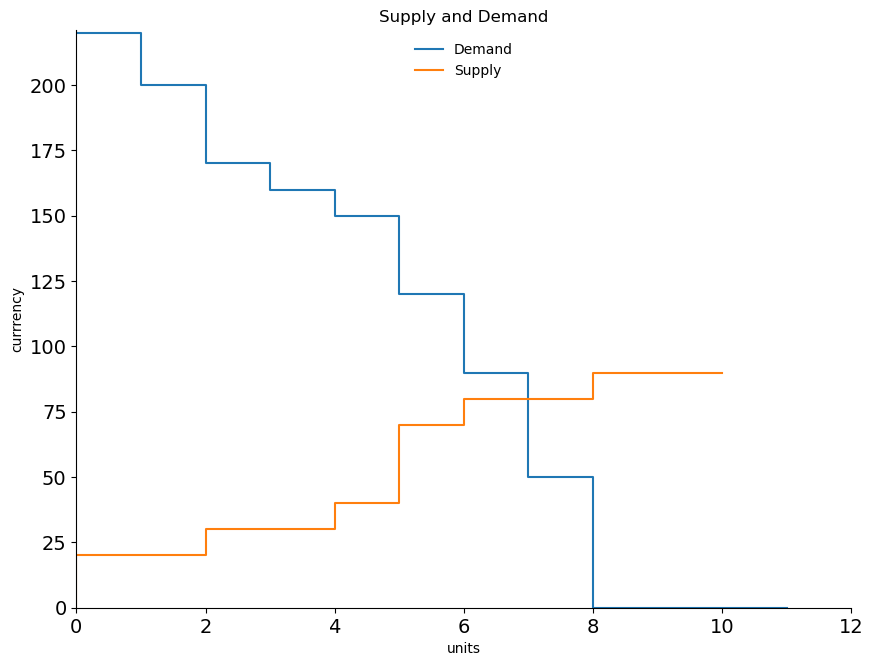

In [22]:
starter = SupplyDemand("Market 1")
starter.show()
starter.add_buyer(0, [200, 90])
starter.add_buyer(1, [150, 50])
starter.add_buyer(2, [220, 120])
starter.add_buyer(3, [170])
starter.add_buyer(4, [160])
starter.add_seller(0, [20, 20, 80, 80])
starter.add_seller(1, [30, 30, 90, 90])
starter.add_seller(2, [40, 70])
print(starter.get_demand())
starter.show_participants()
starter.make_demand()
starter.make_supply()
starter.list_supply_demand()
starter.calc_equilibrium()
starter.show_equilibrium()
starter.plot_supply_demand()

Market Participants
-------------------
BUYERS
------
buyer 0 has unit values [200, 100]
buyer 1 has unit values [150, 125]

SELLERS
-------
seller 0 has unit costs [50, 75]
seller 1 has unit costs [25, 65]
seller 2 has unit costs [60, 70]

Unit    ID     Cost | Value     ID
----------------------------------
      seller 1    25 | 200    buyer 0
      seller 0    50 | 150    buyer 1
      seller 2    60 | 125    buyer 1
      seller 1    65 | 100    buyer 0
----------------------------------
      seller 2    70 |  0     None
      seller 0    75 |  0     None

Market: End Point
   equilibrium price    = 65 - 70
   equilibrium quantity = 4
   maximum surplus      = 375
 


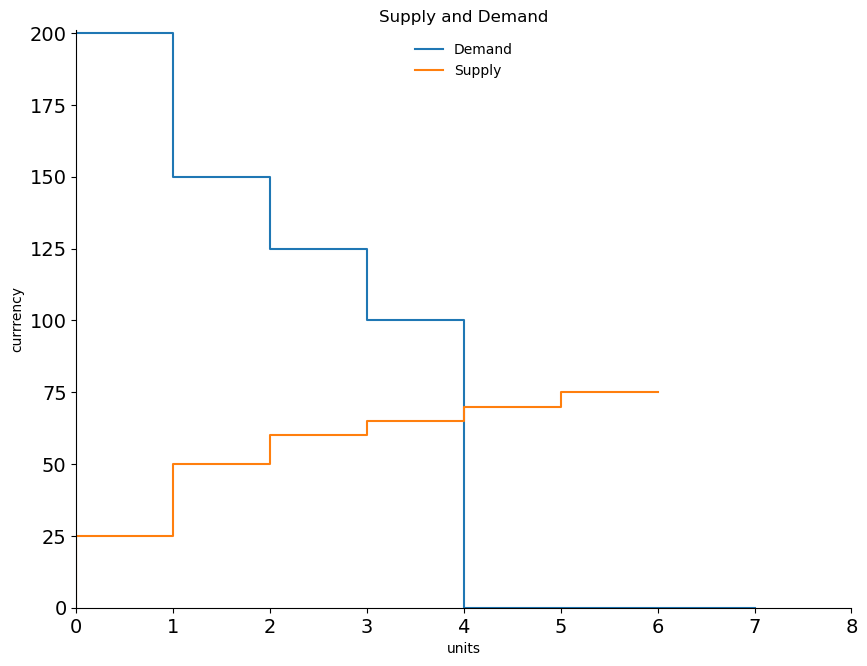

In [24]:
# example where this matters
end_point = SupplyDemand("End Point")
end_point.add_buyer(0, [200, 100])
end_point.add_buyer(1, [150, 125])
end_point.add_seller(0, [50, 75])
end_point.add_seller(1, [25, 65])
end_point.add_seller(2, [60, 70])
end_point.show_participants()
end_point.make_demand()
end_point.make_supply()
end_point.list_supply_demand()
end_point.calc_equilibrium()
end_point.show_equilibrium()
end_point.plot_supply_demand()